In [ ]:
#! pip install --upgrade --no-cache-dir gdown
! gdown 1gQQfj0cY5pQRngCQulY5ylD0FZa9LIZI

Downloading...
From: https://drive.google.com/uc?id=1gQQfj0cY5pQRngCQulY5ylD0FZa9LIZI
To: /content/heart_disease_health_indicators.csv
100% 11.8M/11.8M [00:00<00:00, 64.0MB/s]


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/heart_disease_health_indicators.csv")
df

# Separate the data into two classes
class_0_data = df[df['HeartDiseaseorAttack'] == 0].head(100)
class_1_data = df[df['HeartDiseaseorAttack'] == 1].head(100)

# Create two new DataFrames for each class
df_class_0 = pd.DataFrame(class_0_data, copy=True)
df_class_1 = pd.DataFrame(class_1_data, copy=True)

# If you want to use these two DataFrames for further steps, you can add these lines:
df_class_0.to_csv('class_0_data.csv', index=False)
df_class_1.to_csv('class_1_data.csv', index=False)
class_1_data

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
8,1,1,1,1,30,1,0,2,0,1,...,1,0,5,30,30,1,0,9,5,1
20,1,1,1,1,22,0,1,0,0,1,...,1,0,3,30,0,1,0,12,4,4
26,1,1,1,1,37,1,1,2,0,0,...,1,0,5,0,0,1,1,10,6,5
27,1,1,1,1,28,1,0,2,0,0,...,1,0,4,0,0,0,1,12,2,4
47,1,1,1,1,25,1,0,0,0,1,...,1,0,2,1,0,0,1,10,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,1,1,1,1,25,1,0,2,1,1,...,1,0,2,1,0,0,0,11,6,5
774,1,0,1,1,29,0,0,0,0,1,...,1,0,5,0,30,1,1,13,5,6
784,1,1,0,1,31,0,0,2,0,0,...,1,0,5,0,30,1,1,13,4,5
797,1,1,1,1,30,0,0,0,1,0,...,1,0,5,0,30,1,0,13,3,3


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

# Assuming you have df_class_0 and df_class_1 from the previous code

# Combine the two classes into a new DataFrame
combined_df = pd.concat([df_class_0, df_class_1], ignore_index=True)
combined_df = shuffle(combined_df)

# Separate features (X) and target (y)
X = combined_df.drop('HeartDiseaseorAttack', axis=1)  # Assuming 'HeartDiseaseorAttack' is the target column
y = combined_df['HeartDiseaseorAttack']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
logistic_model = LogisticRegression(solver='sag', max_iter=10000, random_state=83)
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the accuracy of the Logistic Regression model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f'Logistic Regression Accuracy: {accuracy_logistic:.2f}')

# Train Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=10000, random_state=83)
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the accuracy of the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')

# Print shapes for X and predicted values
print("Shapes - X:", X.shape, ", y_pred_rf:", y_pred_rf.shape)


Logistic Regression Accuracy: 0.68
Random Forest Accuracy: 0.53
Shapes - X: (200, 21) , y_pred_rf: (40,)


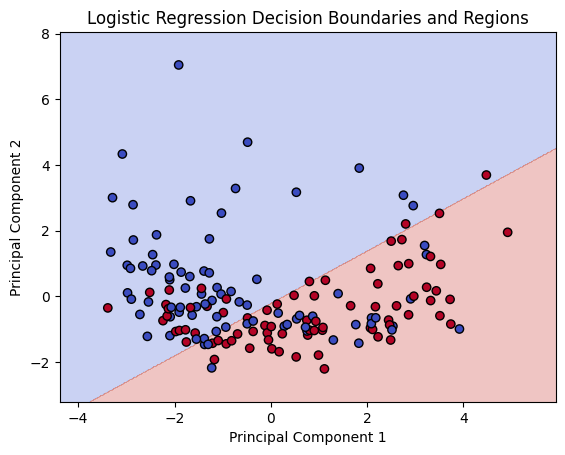

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Assuming you have X_train and y_train from the previous code
# If you don't have a 2D dataset, you might need to use PCA or other dimensionality reduction techniques

# Apply PCA to reduce the data to 2D for visualization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Train Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_pca, y_train)

# Create a meshgrid to plot the decision boundaries
h = 0.02
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the labels for each point in the meshgrid
Z = logistic_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and regions
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)

# Plot the examples
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k', marker='o')
plt.title('Logistic Regression Decision Boundaries and Regions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming you have df_class_0 and df_class_1 from the previous code

# Combine the two classes into a new DataFrame
combined_df = pd.concat([df_class_0, df_class_1], ignore_index=True)

# Separate features (X) and target (y)
X = combined_df.drop('HeartDiseaseorAttack', axis=1)  # Assuming 'HeartDiseaseorAttack' is the target column
y = combined_df['HeartDiseaseorAttack']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=83)

# Train Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the accuracy of the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm:.2f}')

# Train K-Nearest Neighbors (KNN) model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the accuracy of the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn:.2f}')


SVM Accuracy: 0.65
KNN Accuracy: 0.60


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


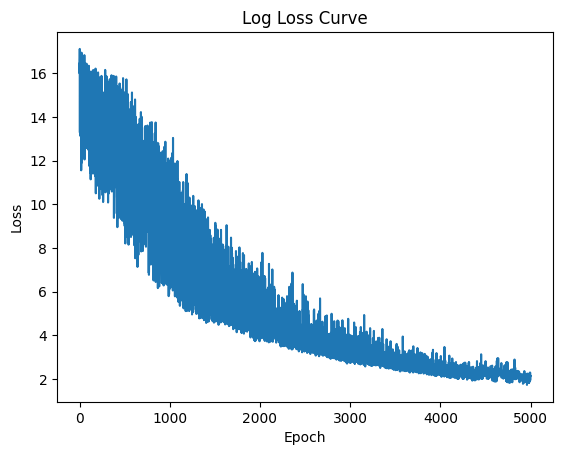

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# Assuming you have X_train and y_train from the previous code
# If not, make sure to replace them with your actual training data

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=83)

model = SGDClassifier(loss='log', random_state=93)
losses = []
epochs = 5000

for epoch in range(epochs):
    model.partial_fit(X_train, y_train, [0, 1])
    loss = log_loss(y_train, model.predict_proba(X_train))
    losses.append(loss)

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Log Loss Curve')
plt.show()


F1 Score for each class: [0.58064516 0.73469388]


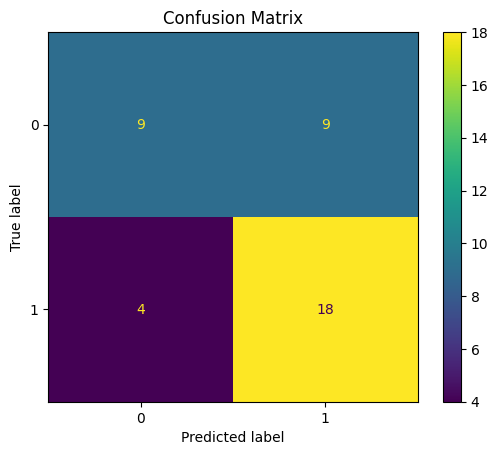

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have y_test and y_pred_logistic from the previous code

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_logistic)

# Calculate F1 score
F1 = f1_score(y_test, y_pred_logistic, average=None)

# Display F1 scores for each class
print("F1 Score for each class:", F1)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()
